## Import packages

In [83]:
import os
import sys
sys.path.append(os.path.join("..", '..'))

#for image loading
import cv2
import matplotlib.pyplot as plt

# Import teaching utils
import numpy as np
import utils.classifier_utils as clf_util
import utils.imutils
from utils.imutils import jimshow

# Import sklearn metrics
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Fetch data

In [8]:
X, y = fetch_openml('mnist_784', return_X_y = True) # big X = data, small y = labels

Depending on the versions of ```pandas``` and ```sklearn``` that you're using, you may need to expressly convert these to ```numpy``` arrays.

In [19]:
X = np.array(X)
y = np.array(y)

__Predifine classes and number of classes__

In [20]:
classes = sorted(set(y))
nclasses = len(classes)

__Plot random sample__

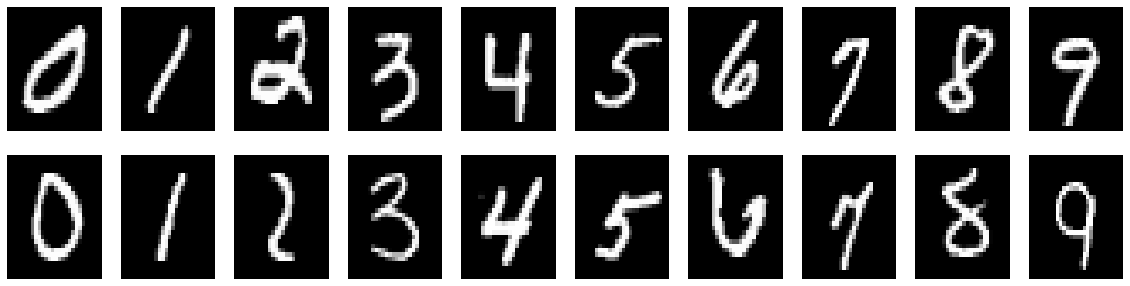

In [23]:
clf_util.plot_sample(X, y, classes, 2) # using a function from the utility folder classifier script. 

## Create training and test dataset

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 7500, test_size = 2500)

We should also scale the features

In [25]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

## Train a logistic regression model

In [49]:
clf = LogisticRegression(penalty = 'none',
                         tol = 0.1,
                         solver = 'saga',
    multi_class = 'multinomial').fit(X_train_scaled, y_train)

In [32]:
clf.coef_.shape

(10, 784)

## Interpreting the coefficients

We can plot the coefficients for our model, showing which 'features' are most informative when it comes to predicting each class

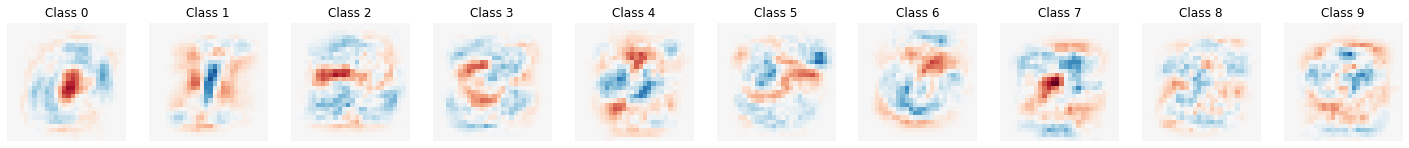

In [50]:
clf_util.plot_coefs(clf.coef_, nclasses)

## Individual predictions

We can then use this model to predict the class of an individual data point.

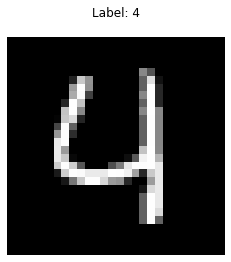

In [59]:
clf_util.plot_individual(X_test_scaled, y_test, 1534)  # not working atm tho

We can compute the conditional probability for each class and then plot the probability distribution.

## Show the distribution of probabilities

I think that this is class 4


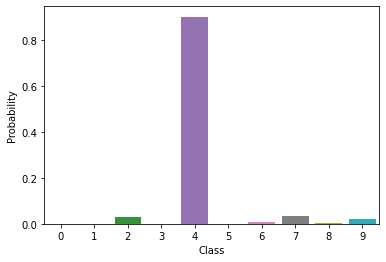

In [56]:
clf_util.plot_probs(X_test_scaled, 1534, clf, classes) # image 358 has multiple

We can find the class with the highest probability. 

If this matches the actual label for the first test sample, then our prediction is correct.

## Accuracy

We can calculate predictions for all data the scaled test data.

In [60]:
y_pred = clf.predict(X_test_scaled)

We then calculate metrics for accuracy based on comparing the predicted labels with the actual labels.

In [64]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

In [69]:
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       251
           1       0.92      0.97      0.94       263
           2       0.87      0.90      0.88       233
           3       0.88      0.87      0.88       289
           4       0.89      0.91      0.90       203
           5       0.87      0.89      0.88       247
           6       0.93      0.92      0.93       254
           7       0.91      0.90      0.91       260
           8       0.90      0.81      0.85       243
           9       0.91      0.89      0.90       257

    accuracy                           0.90      2500
   macro avg       0.90      0.90      0.90      2500
weighted avg       0.90      0.90      0.90      2500



This can be visualised using a confusion matrix

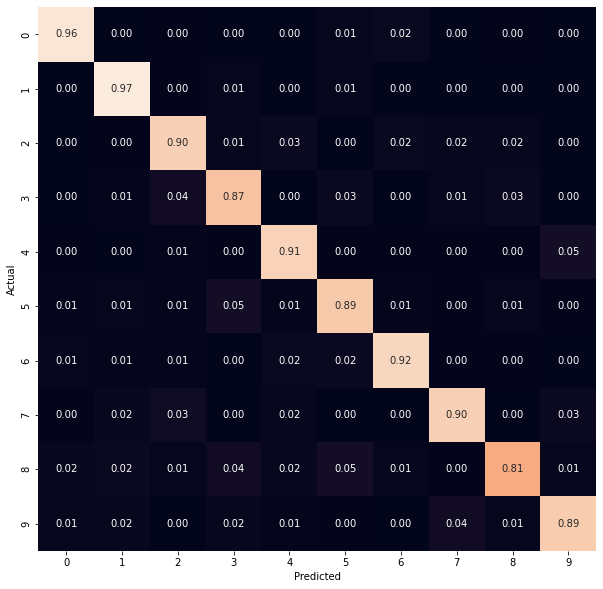

In [76]:
clf_util.plot_cm(y_test, y_pred, normalized = False)

We can also normalize the confusion matrix to show percentages instead of raw values

In [ ]:
clf_util.plot_cm(y_test, y_pred, normalized = True)

## Test on new data

In [98]:
filepath = os.path.join('..', '..', '..', 'CDS-VIS', 'test_nums', 'test2.jpg')
test_image = cv2.imread(filepath)

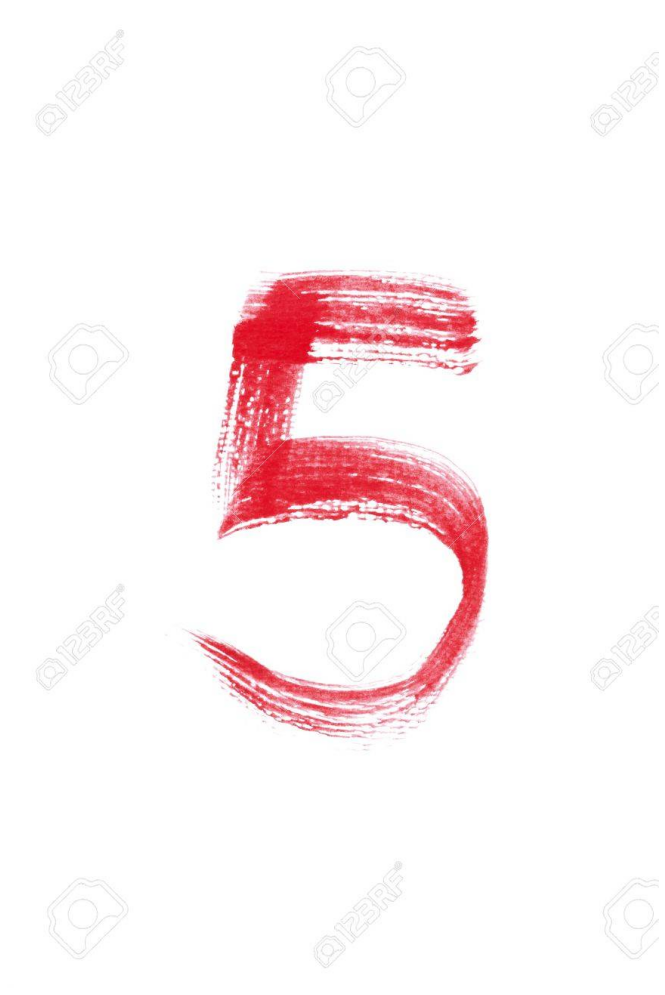

In [99]:
jimshow(test_image) # wrong colors

Use bitwise not to invert regular grayscale

In [100]:
greyscale = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
inverted = cv2.bitwise_not(greyscale)

Resize down to 28x28 image

In [101]:
compressed = cv2.resize(inverted, (28,28), interpolation = cv2.INTER_AREA)

In [106]:
scaled = compressed/255

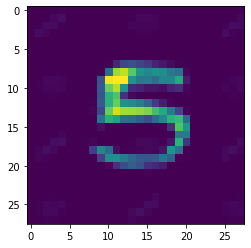

In [107]:
plt.imshow(scaled)

I think that this is class 5


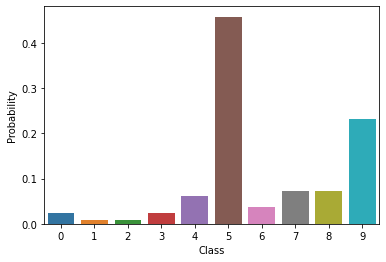

In [108]:
clf_util.predict_unseen(scaled, clf, classes)

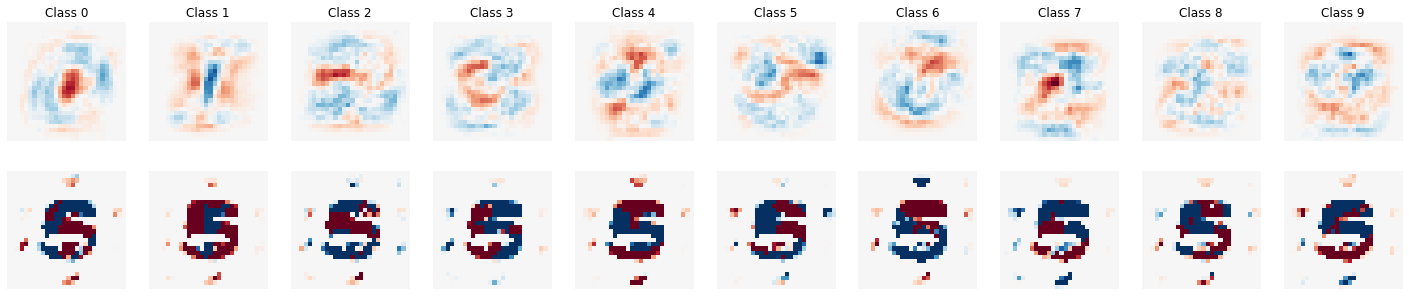

In [105]:
clf_util.prediction_coefficients(compressed, clf, classes)